In [4]:
from scipy.io import readsav
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import glob
import pandas as pd

# Read radar and auxiliary data. Plot some examples.

In [2]:
data_dir = '/home/study/radar_data'

lat_dict = readsav(f"{data_dir}/auxiliary/radar_lat.sav")
lon_dict = readsav(f"{data_dir}/auxiliary/radar_lon.sav")
inci_dict = readsav(f"{data_dir}/auxiliary/inci_arr.sav")
mask_dict = readsav(f"{data_dir}/auxiliary/radar_mask.sav")

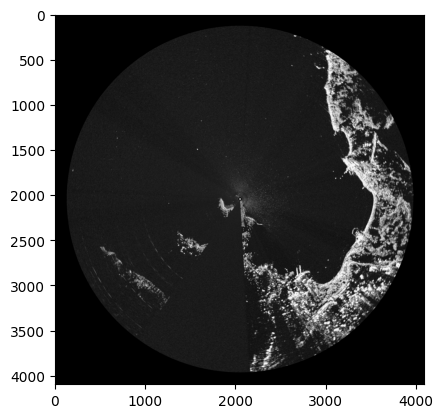

In [5]:
img = np.array(Image.open('../data/radar/20161019T000005+0300.png'))
plt.imshow(img, cmap='gray')

In [6]:
print(img.shape, img.mean())

(4096, 4096) 28.236813187599182


# Mean of radar data inside mask

In [ ]:
# Mean and STD values in time
image_files = sorted(glob.glob(f'{data_dir}/radar/*.png'))
data = pd.DataFrame({'filename': image_files})
data.head()

In [ ]:
mask_arr = np.flip(mask_dict['mask'],0)
mask_arr = mask_arr.copy()
mask_arr[mask_arr > 0] = 1

In [ ]:
means, stds = [], []
for f in image_files:
    arr = np.array(Image.open(f))
    means.append(np.nanmean(arr[mask_arr == 1]))
    stds.append(np.nanstd(arr[mask_arr == 1]))
data['mean_intensity'] = means
data['std_intensity'] = stds

In [ ]:
plt.plot(data['mean_intensity'])
plt.xlabel("Mean intensity")
plt.ylabel("Wave height (m)")